<a href="https://colab.research.google.com/github/Abhilash1781/DL-Simplified/blob/Brain/Brain_Tumor_Detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import glob

In [ ]:
from zipfile import ZipFile
file_name = '/content/archive (2).zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')


Done


In [ ]:
Non_tumorous_images = '/content/no'
Tumorous_images = '/content/yes'

In [ ]:
print('Total number of Non_Tumor Images are ' , len(os.listdir(Non_tumorous_images)))
print('Total number of Tumor Images are ' , len(os.listdir(Tumorous_images)))

Total number of Non_Tumor Images are  1500
Total number of Tumor Images are  1500


In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
 


Working with 1500 images
Image examples: 
y869.jpg


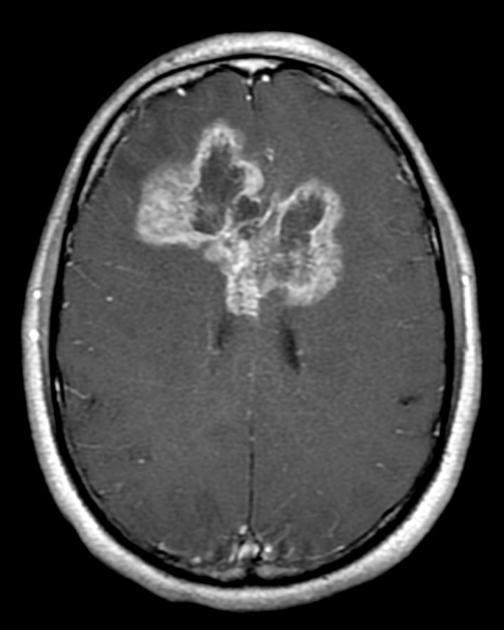

y1101.jpg


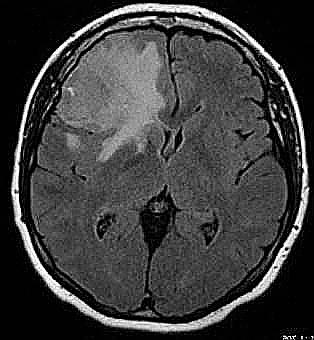

y538.jpg


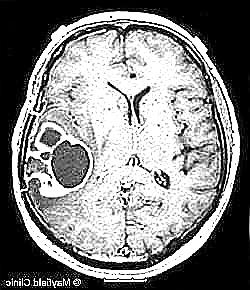

y1430.jpg


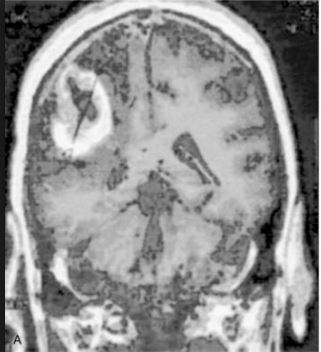

y1018.jpg


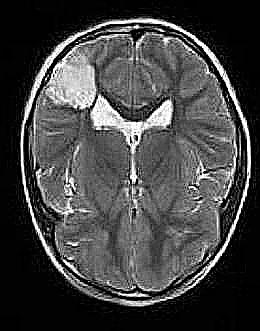

In [ ]:
folder = Tumorous_images


onlytumorfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlytumorfiles)))
print("Image examples: ")


for i in range(5):
    print(onlytumorfiles[i])
    display(_Imgdis(filename=folder + "/" + onlytumorfiles[i], width=180, height=180))

Working with 1500 images
Image examples: 
no499.jpg


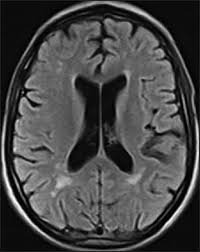

no1299.jpg


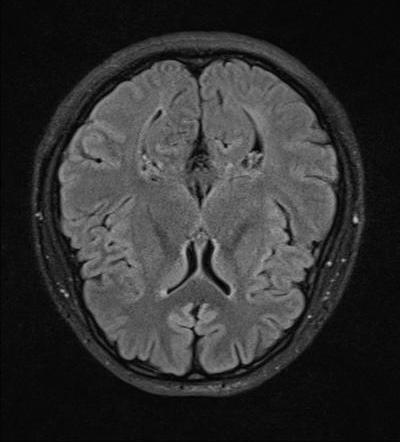

no1014.jpg


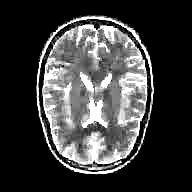

no348.jpg


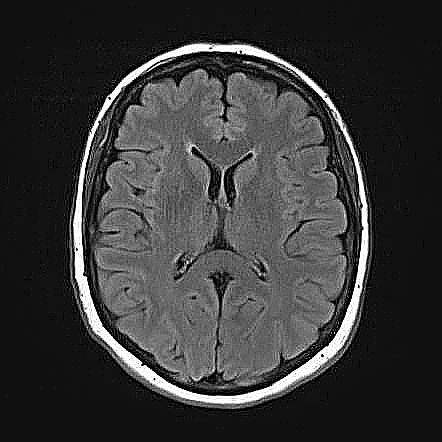

no1053.jpg


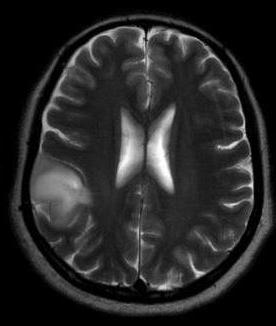

In [ ]:
folder = Non_tumorous_images


only_non_tumorous_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(only_non_tumorous_files)))
print("Image examples: ")


for i in range(5):
    print(only_non_tumorous_files[i])
    display(_Imgdis(filename=folder + "/" + only_non_tumorous_files[i], width=180, height=180))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:

images = []
for i in range(10):
  im = img.imread('yes/y{}.jpg'.format(i))
  images.append(im)
  print('image shape', im.shape, 'maximum color level', im.max())

image shape (348, 287, 3) maximum color level 255
image shape (630, 587, 3) maximum color level 255
image shape (309, 232, 3) maximum color level 255
image shape (351, 273, 3) maximum color level 255
image shape (336, 264, 3) maximum color level 255
image shape (303, 223, 3) maximum color level 255
image shape (355, 290, 3) maximum color level 255
image shape (318, 273, 3) maximum color level 255
image shape (347, 300, 3) maximum color level 255
image shape (173, 189, 3) maximum color level 255


In [ ]:
from tensorflow import keras
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator
gen = ImageDataGenerator()
     

In [ ]:

iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('yes','no')
)

Found 3000 images belonging to 2 classes.


In [ ]:
batch = iterator.next()
len(batch)

2

In [ ]:

print(type(batch[0]))
print(type(batch[1]))
     

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


In [ ]:
IMAGE_SIZE = [224, 224]

# **VGG 16**

In [ ]:
from keras.applications.vgg16 import VGG16 , preprocess_input
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D ,Activation, Dropout, Flatten, Dense , Input, Lambda

In [ ]:
vgg = VGG16( input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model_2 = Model(inputs=vgg.input, outputs=prediction)
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:

imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2
)

batch_size = 16
height, width = (224,224)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('yes','no'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('yes','no'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
model_2.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history_2 = model_2.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    epochs=10,
)

Epoch 1/10


<ipython-input-33-561bb623c0b0>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = model_2.fit_generator(


150/150 [==============================] - 38s 242ms/step - loss: 0.6525 - acc: 0.6983 - val_loss: 0.4984 - val_acc: 0.7700
Epoch 2/10
150/150 [==============================] - 36s 238ms/step - loss: 0.4300 - acc: 0.8000 - val_loss: 0.4327 - val_acc: 0.7983
Epoch 3/10
150/150 [==============================] - 37s 244ms/step - loss: 0.3412 - acc: 0.8554 - val_loss: 0.2673 - val_acc: 0.8883
Epoch 4/10
150/150 [==============================] - 37s 245ms/step - loss: 0.2407 - acc: 0.9092 - val_loss: 0.1824 - val_acc: 0.9367
Epoch 5/10
150/150 [==============================] - 37s 248ms/step - loss: 0.1999 - acc: 0.9221 - val_loss: 0.2573 - val_acc: 0.8800
Epoch 6/10
150/150 [==============================] - 38s 251ms/step - loss: 0.1343 - acc: 0.9446 - val_loss: 0.0654 - val_acc: 0.9783
Epoch 7/10
150/150 [==============================] - 38s 253ms/step - loss: 0.0897 - acc: 0.9712 - val_loss: 0.1160 - val_acc: 0.9550
Epoch 8/10
150/150 [==============================] - 38s 255ms/st

# **PLOT THE CURVES FOR VGG16**

In [ ]:
def plot_history(history, yrange):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

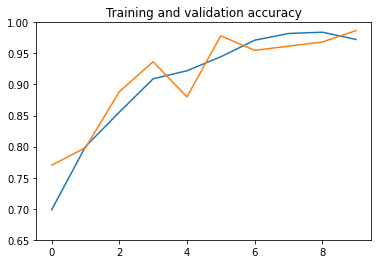

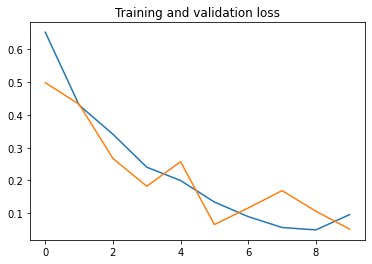

In [ ]:
plot_history(history_2, (0.65, 1.))

In [ ]:

resnet50 = keras.applications.resnet50

In [ ]:

imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2
)

batch_size = 16
height, width = (224,224)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('yes','no'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('yes','no'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import BatchNormalization

# **RESNET 50**

In [ ]:
Model_3 = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in Model_3.layers:
    layer.trainable = False
x = keras.layers.Flatten()(Model_3.output)
x = BatchNormalization()(x)
x = keras.layers.Dense(256, activation='relu')(x)


x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(2, activation='sigmoid')(x)
complete_model = keras.models.Model(inputs=Model_3.input, outputs=predictions)
complete_model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_25[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
complete_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history_3 = complete_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    epochs=10,
)

Epoch 1/10


<ipython-input-89-0524eb092fe3>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_3 = complete_model.fit_generator(


150/150 [==============================] - 17s 90ms/step - loss: 0.5946 - acc: 0.7679 - val_loss: 0.4420 - val_acc: 0.7917
Epoch 2/10
150/150 [==============================] - 13s 84ms/step - loss: 0.2765 - acc: 0.8800 - val_loss: 0.3374 - val_acc: 0.8933
Epoch 3/10
150/150 [==============================] - 13s 85ms/step - loss: 0.1696 - acc: 0.9396 - val_loss: 0.2059 - val_acc: 0.9417
Epoch 4/10
150/150 [==============================] - 13s 85ms/step - loss: 0.1035 - acc: 0.9663 - val_loss: 0.1975 - val_acc: 0.9417
Epoch 5/10
150/150 [==============================] - 13s 85ms/step - loss: 0.0928 - acc: 0.9696 - val_loss: 0.1579 - val_acc: 0.9667
Epoch 6/10
150/150 [==============================] - 13s 85ms/step - loss: 0.0678 - acc: 0.9762 - val_loss: 0.1521 - val_acc: 0.9717
Epoch 7/10
150/150 [==============================] - 13s 85ms/step - loss: 0.0665 - acc: 0.9804 - val_loss: 0.1839 - val_acc: 0.9650
Epoch 8/10
150/150 [==============================] - 13s 89ms/step - los

# **PLOT THE CURVES FOR RESNET50**

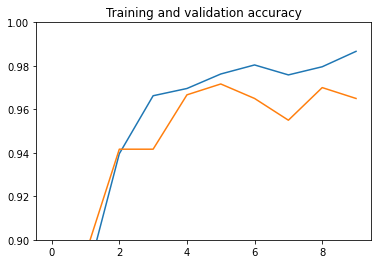

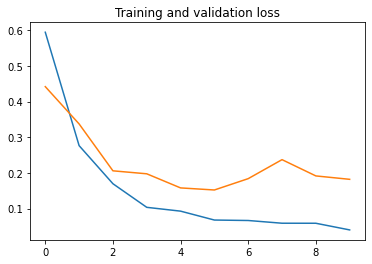

In [ ]:
plot_history(history_3, yrange=(0.9,1))

Save the model since RESNET50 gave better results than VGG16 and CNN

In [ ]:
complete_model.save_weights('resnet50.h5')

In [ ]:
complete_model.load_weights('resnet50.h5')

In [ ]:
import numpy as np

# **PREDICTING RESULTS FOR NEW IMAGES**
The images are taken from the "pred" folder 

# **EXAMPLE 1: NON-TUMOROUS**

1/1 [==============================] - 0s 21ms/step
[[0. 1.]]


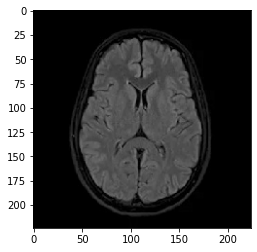

In [ ]:
import keras.utils as image
from keras.applications.imagenet_utils import preprocess_input
img_path = 'pred/pred0.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(complete_model.predict(x))
plt.imshow(img)

# **EXAMPLE 2 : NON-TUMOROUS**

1/1 [==============================] - 0s 58ms/step
[[0.00427303 0.99999964]]


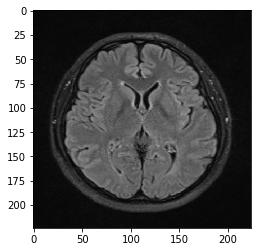

In [ ]:
img_path = 'pred/pred44.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(complete_model.predict(x))
plt.imshow(img)

# **EXAMPLE 3 : TUMOROUS**

1/1 [==============================] - 0s 22ms/step
[[1. 0.]]


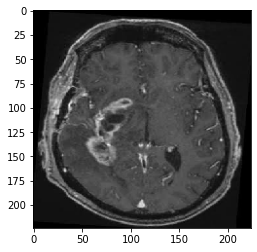

In [ ]:
img_path = 'pred/pred11.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(complete_model.predict(x))
plt.imshow(img)

# **EXAMPLE 4 : TUMOROUS**

1/1 [==============================] - 0s 20ms/step
[[1. 0.]]


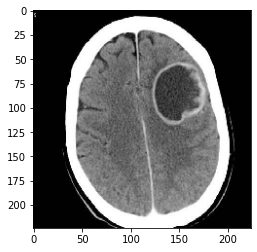

In [ ]:
img_path = 'pred/pred10.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(complete_model.predict(x))
plt.imshow(img)